# Some Important Points: 🔋 


1.   V(max) = 4.2 volt
2.   V(min) = 2.8/2.7 Volt
3.   Nominal Charge capacity = 2500 mA/2.5Ah 
4.   SOC = Normal Capacity at that point/Nominal capacity
5.   Nominal Capacity - ammount of charged deliverd by fully charge batter, when it is fresh. OR **we can say Total capacity of battery.**
6.   SOH = Maximum of SOC at one cycle.
7.   we can find SOH by making set of loops in dataset and then find max(SOC).


# Models 📌


1.   (DNN) Deep Neural Network 
2.   LSTM
3.   CNN
4.   GPR (Gaussian Progress Rregressor)
5.   Genetic Algorithms
6.   Support Vector Regressor
7.   Random Forest



# Model Partitioning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Reading the data
df = pd.read_csv("trial1.csv")
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C,Capacity/Ah,Nominal_Capacity/Ah
0,0.4,3.54,1.25,0.00,0.0,2.5
1,1.0,3.54,1.25,0.95,0.0,2.5
2,2.0,3.54,1.25,2.28,0.0,2.5
3,3.0,3.55,1.25,3.46,0.0,2.5
4,4.0,3.55,1.25,4.64,0.0,2.5


In [3]:
df.rename(columns= {'Time/sec':'Time', 'Potential/V':'Potential', 'Current/A':'Current', 'Charge/C':'Charge',
                    'Capacity/Ah':'Capacity', 'Nominal_Capacity/Ah':'Nominal_Capacity'},inplace=True)

In [4]:
df.insert(loc = 6,column ='SOC',value=df['Capacity']/df['Nominal_Capacity']) 

In [5]:
df.insert(loc = 7,column ='Power',value=df['Current']*df["Potential"])

In [6]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC,Power
0,0.4,3.54,1.25,0.00,0.0,2.5,0.0,4.4250
1,1.0,3.54,1.25,0.95,0.0,2.5,0.0,4.4250
2,2.0,3.54,1.25,2.28,0.0,2.5,0.0,4.4250
3,3.0,3.55,1.25,3.46,0.0,2.5,0.0,4.4375
4,4.0,3.55,1.25,4.64,0.0,2.5,0.0,4.4375


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   SOC               242885 non-null  float64
 7   Power             242885 non-null  float64
dtypes: float64(8)
memory usage: 14.8 MB


In [8]:
df.isnull().sum()

Time                0
Potential           0
Current             0
Charge              0
Capacity            0
Nominal_Capacity    0
SOC                 0
Power               0
dtype: int64

In [9]:
df.describe()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC,Power
count,242885.000000,242885.000000,242885.000000,242885.000000,242885.000000,242885.0,242885.000000,242885.000000
mean,124950.840426,3.839404,0.034547,5083.012369,1.412284,2.5,0.564913,0.394564
std,72231.050997,0.385144,1.234725,3185.178306,0.884470,0.0,0.353788,4.354979
min,0.400000,2.750000,-2.500000,0.000000,0.000000,2.5,0.000000,-9.650000
25%,62490.800000,3.440000,0.000000,1920.000000,0.530000,2.5,0.212000,0.000000
50%,124983.000000,3.940000,0.080000,5790.000000,1.610000,2.5,0.644000,0.336000
75%,187475.100000,4.200000,1.250000,8280.000000,2.300000,2.5,0.920000,4.662500
max,249967.200000,4.200000,1.260000,8680.000000,2.410000,2.5,0.964000,5.292000


# Normalizing the Values 

In [10]:
callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 10,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Charge', 'Capacity','SOC','Power'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [12]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC,Power
0,0.000000,0.544828,0.99734,0.000000,0.0,2.5,0.0,0.941976
1,0.000002,0.544828,0.99734,0.000109,0.0,2.5,0.0,0.941976
2,0.000006,0.544828,0.99734,0.000263,0.0,2.5,0.0,0.941976
3,0.000010,0.551724,0.99734,0.000399,0.0,2.5,0.0,0.942812
4,0.000014,0.551724,0.99734,0.000535,0.0,2.5,0.0,0.942812


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   SOC               242885 non-null  float64
 7   Power             242885 non-null  float64
dtypes: float64(8)
memory usage: 14.8 MB


# Spliting the Data into train and test

In [14]:
Y = df.pop('Power')
X = df

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [16]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((194308, 7), (48577, 7), (194308,), (48577,))

In [17]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

# DNN

## Model 1
Normal Deep earning neural network
with 3 layers and relu activation

In [18]:
%%time
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='linear'),
                               tf.keras.layers.Dense(20, activation = 'relu'),
                               tf.keras.layers.Dense(1,'linear')])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_1 = model_1.fit(X_train,Y_train, epochs= 200,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/200
6073/6073 [==============================] - 9s 1ms/step - loss: 0.0112 - rmse: 0.0507 - mae: 0.0112 - mse: 0.0026 - val_loss: 0.0049 - val_rmse: 0.0096 - val_mae: 0.0049 - val_mse: 9.2397e-05
Epoch 2/200
6073/6073 [==============================] - 9s 1ms/step - loss: 0.0050 - rmse: 0.0091 - mae: 0.0050 - mse: 8.2868e-05 - val_loss: 0.0041 - val_rmse: 0.0079 - val_mae: 0.0041 - val_mse: 6.1955e-05
Epoch 3/200
6073/6073 [==============================] - 9s 2ms/step - loss: 0.0032 - rmse: 0.0058 - mae: 0.0032 - mse: 3.3667e-05 - val_loss: 0.0046 - val_rmse: 0.0054 - val_mae: 0.0046 - val_mse: 2.8732e-05
Epoch 4/200
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0021 - rmse: 0.0034 - mae: 0.0021 - mse: 1.1505e-05 - val_loss: 0.0012 - val_rmse: 0.0023 - val_mae: 0.0012 - val_mse: 5.1951e-06
Epoch 5/200
6073/6073 [==============================] - 16s 3ms/step - loss: 0.0018 - rmse: 0.0026 - mae: 0.0018 - mse: 6.8760e-06 - val_loss: 0.0015 - val_rmse: 0.00

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_1.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 2.1488e-04 - rmse: 5.3567e-04 - mae: 2.1488e-04 - mse: 2.8694e-07


[0.00021487742196768522,
 0.0005356680485419929,
 0.00021487742196768522,
 2.8694023512798594e-07]

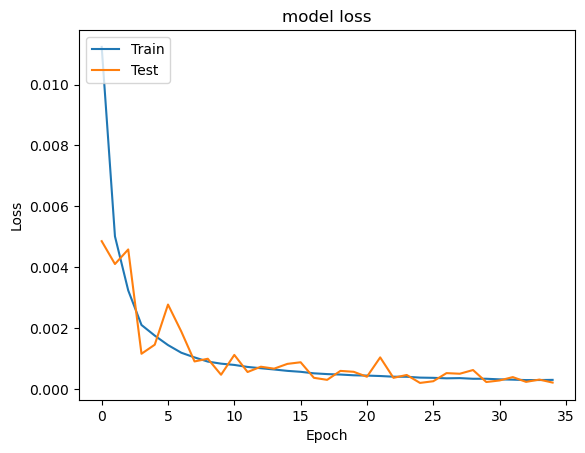

In [21]:
plot_his(history_1)

In [22]:
prediction = model_1.predict(X_test)
print(prediction[:10])

1519/1519 [==============================] - 2s 1ms/step
[[0.64567876]
 [0.97786736]
 [0.6652715 ]
 [0.64600194]
 [0.01532391]
 [0.84811103]
 [0.9628712 ]
 [0.6878029 ]
 [0.6460215 ]
 [0.6456506 ]]


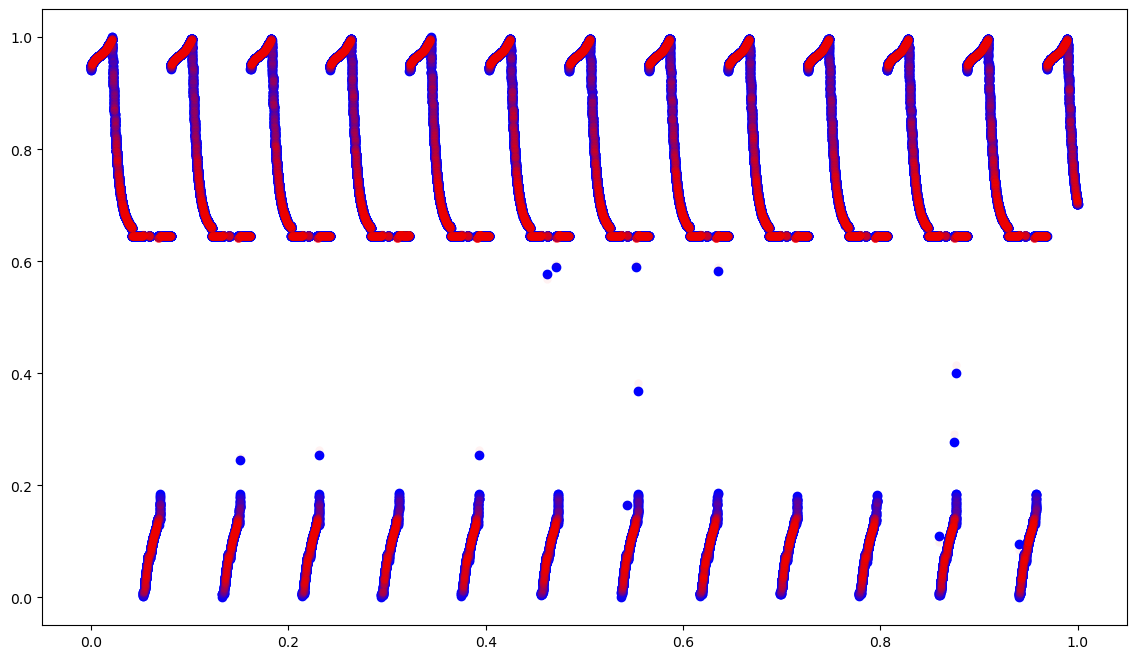

In [23]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction,color='red',alpha=0.05,linewidths=0.02)
plt.show()

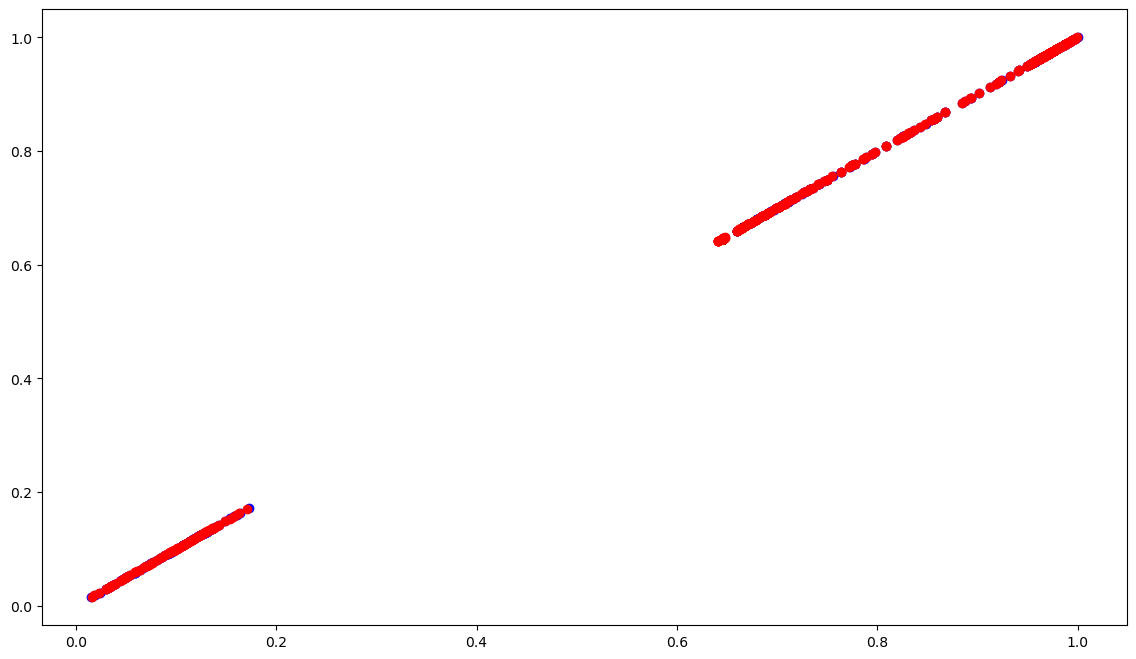

In [24]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction[300:900], prediction[300:900], color='red')
plt.show()

## Model_1_1

In [25]:
tf.random.set_seed(42)

model__1_1 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='linear'),
                                  tf.keras.layers.Dense(30, activation='linear'),
                                  tf.keras.layers.Dense(10, activation = 'linear'),
                                  tf.keras.layers.Dense(1,activation = 'linear')])

model__1_1.compile(loss = tf.keras.metrics.mean_squared_error,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

#here using callback feature
history_1_1 = model__1_1.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test))

Epoch 1/100
6073/6073 [==============================] - 14s 2ms/step - loss: 0.0020 - rmse: 0.0447 - mae: 0.0216 - mse: 0.0020 - val_loss: 6.7356e-04 - val_rmse: 0.0260 - val_mae: 0.0217 - val_mse: 6.7356e-04
Epoch 2/100
6073/6073 [==============================] - 8s 1ms/step - loss: 5.5761e-04 - rmse: 0.0236 - mae: 0.0185 - mse: 5.5761e-04 - val_loss: 5.2520e-04 - val_rmse: 0.0229 - val_mae: 0.0173 - val_mse: 5.2520e-04
Epoch 3/100
6073/6073 [==============================] - 8s 1ms/step - loss: 5.2950e-04 - rmse: 0.0230 - mae: 0.0180 - mse: 5.2950e-04 - val_loss: 5.2948e-04 - val_rmse: 0.0230 - val_mae: 0.0185 - val_mse: 5.2948e-04
Epoch 4/100
6073/6073 [==============================] - 13s 2ms/step - loss: 5.1468e-04 - rmse: 0.0227 - mae: 0.0178 - mse: 5.1468e-04 - val_loss: 5.3478e-04 - val_rmse: 0.0231 - val_mae: 0.0180 - val_mse: 5.3478e-04
Epoch 5/100
6073/6073 [==============================] - 13s 2ms/step - loss: 5.1093e-04 - rmse: 0.0226 - mae: 0.0177 - mse: 5.1093e-04 - 

6073/6073 [==============================] - 8s 1ms/step - loss: 4.8775e-04 - rmse: 0.0221 - mae: 0.0173 - mse: 4.8775e-04 - val_loss: 4.8766e-04 - val_rmse: 0.0221 - val_mae: 0.0175 - val_mse: 4.8766e-04
Epoch 39/100
6073/6073 [==============================] - 8s 1ms/step - loss: 4.8730e-04 - rmse: 0.0221 - mae: 0.0173 - mse: 4.8730e-04 - val_loss: 5.0255e-04 - val_rmse: 0.0224 - val_mae: 0.0174 - val_mse: 5.0255e-04
Epoch 40/100
6073/6073 [==============================] - 8s 1ms/step - loss: 4.8746e-04 - rmse: 0.0221 - mae: 0.0173 - mse: 4.8746e-04 - val_loss: 4.8919e-04 - val_rmse: 0.0221 - val_mae: 0.0175 - val_mse: 4.8919e-04
Epoch 41/100
6073/6073 [==============================] - 8s 1ms/step - loss: 4.8731e-04 - rmse: 0.0221 - mae: 0.0173 - mse: 4.8731e-04 - val_loss: 4.9015e-04 - val_rmse: 0.0221 - val_mae: 0.0171 - val_mse: 4.9015e-04
Epoch 42/100
6073/6073 [==============================] - 8s 1ms/step - loss: 4.8751e-04 - rmse: 0.0221 - mae: 0.0173 - mse: 4.8751e-04 - val

Epoch 76/100
6073/6073 [==============================] - 7s 1ms/step - loss: 4.8560e-04 - rmse: 0.0220 - mae: 0.0173 - mse: 4.8560e-04 - val_loss: 4.8848e-04 - val_rmse: 0.0221 - val_mae: 0.0174 - val_mse: 4.8848e-04
Epoch 77/100
6073/6073 [==============================] - 7s 1ms/step - loss: 4.8526e-04 - rmse: 0.0220 - mae: 0.0173 - mse: 4.8526e-04 - val_loss: 4.8687e-04 - val_rmse: 0.0221 - val_mae: 0.0173 - val_mse: 4.8687e-04
Epoch 78/100
6073/6073 [==============================] - 8s 1ms/step - loss: 4.8540e-04 - rmse: 0.0220 - mae: 0.0173 - mse: 4.8540e-04 - val_loss: 4.8721e-04 - val_rmse: 0.0221 - val_mae: 0.0173 - val_mse: 4.8721e-04
Epoch 79/100
6073/6073 [==============================] - 9s 2ms/step - loss: 4.8561e-04 - rmse: 0.0220 - mae: 0.0173 - mse: 4.8561e-04 - val_loss: 4.9266e-04 - val_rmse: 0.0222 - val_mae: 0.0171 - val_mse: 4.9266e-04
Epoch 80/100
6073/6073 [==============================] - 8s 1ms/step - loss: 4.8548e-04 - rmse: 0.0220 - mae: 0.0173 - mse: 4.8

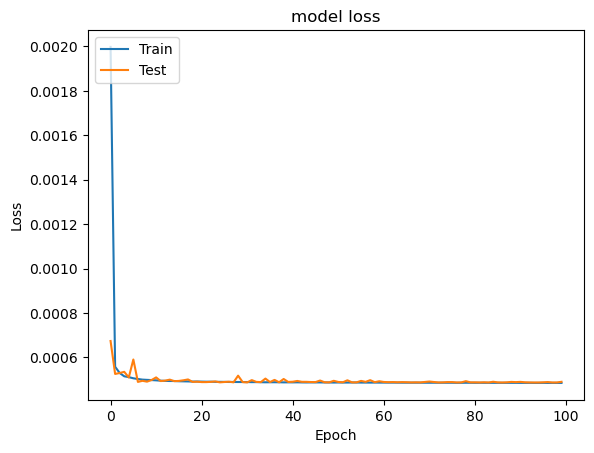

In [26]:
plot_his(history_1_1)

In [27]:
prediction_1_1 = model__1_1.predict(X_test)
print(prediction_1_1[:10])

1519/1519 [==============================] - 1s 669us/step
[[0.659387  ]
 [0.9645785 ]
 [0.676131  ]
 [0.67390716]
 [0.06985755]
 [0.8317785 ]
 [0.9604377 ]
 [0.69566286]
 [0.6751439 ]
 [0.65952075]]


In [28]:
model__1_1.evaluate(X_test,Y_test)

1519/1519 [==============================] - 1s 786us/step - loss: 4.8984e-04 - rmse: 0.0221 - mae: 0.0176 - mse: 4.8984e-04


[0.0004898420302197337,
 0.022132374346256256,
 0.017555832862854004,
 0.0004898420302197337]

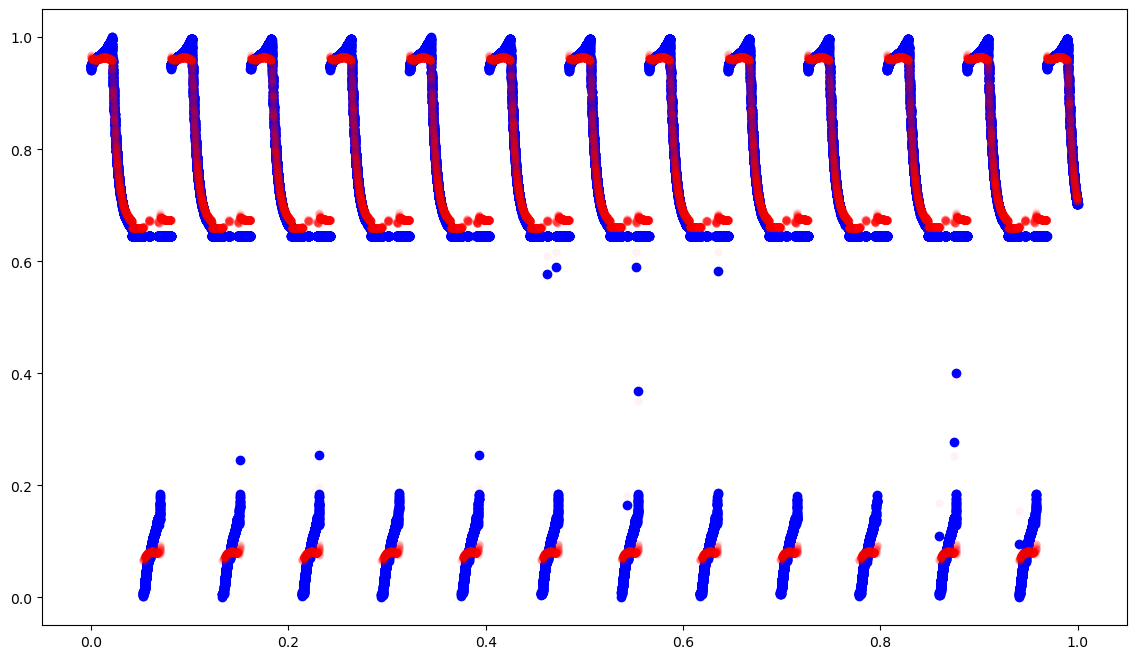

In [29]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_1_1,color='red',alpha=0.05,linewidths=0.02)
plt.show()

In [30]:
%%time
tf.random.set_seed(42)

model__1_2 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='linear'),
                                  tf.keras.layers.Dense(20, activation = 'linear'),
                                  tf.keras.layers.Dense(1,activation = 'linear')])

model__1_2.compile(loss = tf.keras.metrics.mean_squared_error,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

#here using callback feature
history_1_2 = model__1_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0015 - rmse: 0.0392 - mae: 0.0220 - mse: 0.0015 - val_loss: 8.4303e-04 - val_rmse: 0.0290 - val_mae: 0.0250 - val_mse: 8.4303e-04
Epoch 2/100
6073/6073 [==============================] - 8s 1ms/step - loss: 6.0549e-04 - rmse: 0.0246 - mae: 0.0195 - mse: 6.0549e-04 - val_loss: 5.4174e-04 - val_rmse: 0.0233 - val_mae: 0.0174 - val_mse: 5.4174e-04
Epoch 3/100
6073/6073 [==============================] - 8s 1ms/step - loss: 5.5749e-04 - rmse: 0.0236 - mae: 0.0186 - mse: 5.5749e-04 - val_loss: 5.2696e-04 - val_rmse: 0.0230 - val_mae: 0.0170 - val_mse: 5.2696e-04
Epoch 4/100
6073/6073 [==============================] - 9s 1ms/step - loss: 5.3782e-04 - rmse: 0.0232 - mae: 0.0183 - mse: 5.3782e-04 - val_loss: 5.2238e-04 - val_rmse: 0.0229 - val_mae: 0.0186 - val_mse: 5.2238e-04
Epoch 5/100
6073/6073 [==============================] - 8s 1ms/step - loss: 5.2675e-04 - rmse: 0.0230 - mae: 0.0181 - mse: 5.2675e-04 - va

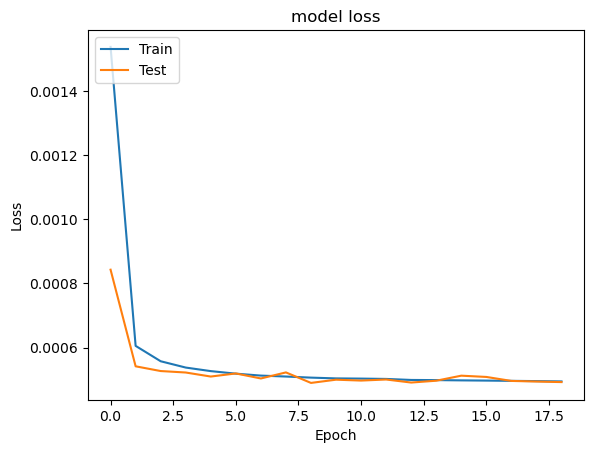

In [31]:
plot_his(history_1_2)

In [32]:
model__1_2.evaluate(X_test,Y_test)

1519/1519 [==============================] - 1s 882us/step - loss: 4.9250e-04 - rmse: 0.0222 - mae: 0.0178 - mse: 4.9250e-04


[0.0004925004323013127,
 0.022192351520061493,
 0.017814040184020996,
 0.0004925004323013127]

# LSTM
LSTM ( Long short term memory)


## Model 2

In [33]:
%%time
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'relu',return_sequences=True, input_shape=(7,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_2 = model_2.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/30
6073/6073 [==============================] - 36s 6ms/step - loss: 0.0286 - rmse: 0.0737 - mae: 0.0286 - mse: 0.0054 - val_loss: 0.0083 - val_rmse: 0.0118 - val_mae: 0.0083 - val_mse: 1.3834e-04
Epoch 2/30
6073/6073 [==============================] - 35s 6ms/step - loss: 0.0073 - rmse: 0.0102 - mae: 0.0073 - mse: 1.0443e-04 - val_loss: 0.0056 - val_rmse: 0.0080 - val_mae: 0.0056 - val_mse: 6.3233e-05
Epoch 3/30
6073/6073 [==============================] - 37s 6ms/step - loss: 0.0054 - rmse: 0.0077 - mae: 0.0054 - mse: 5.9161e-05 - val_loss: 0.0034 - val_rmse: 0.0059 - val_mae: 0.0034 - val_mse: 3.4760e-05
Epoch 4/30
6073/6073 [==============================] - 35s 6ms/step - loss: 0.0046 - rmse: 0.0067 - mae: 0.0046 - mse: 4.4576e-05 - val_loss: 0.0036 - val_rmse: 0.0058 - val_mae: 0.0036 - val_mse: 3.3591e-05
Epoch 5/30
6073/6073 [==============================] - 38s 6ms/step - loss: 0.0039 - rmse: 0.0059 - mae: 0.0039 - mse: 3.5007e-05 - val_loss: 0.0061 - val_rmse: 0.0074

In [34]:
model_2.evaluate(X_test,Y_test)

1519/1519 [==============================] - 3s 2ms/step - loss: 0.0022 - rmse: 0.0038 - mae: 0.0022 - mse: 1.4552e-05


[0.0022231214679777622,
 0.0038147319573909044,
 0.0022231214679777622,
 1.4552179891325068e-05]

In [35]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


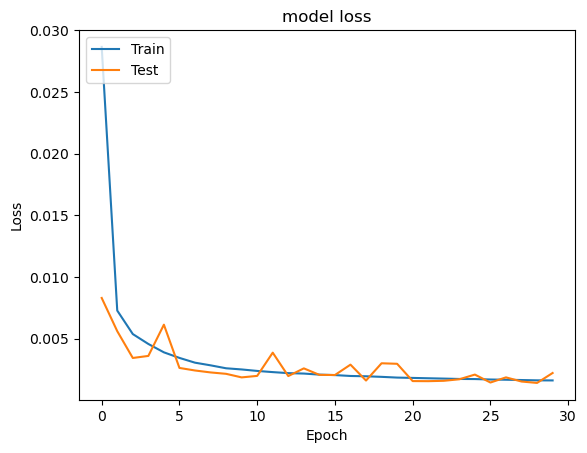

In [36]:
plot_his(history_2)

In [37]:
prediction_2 = model_2.predict(X_test)
print(prediction_2[:20])

1519/1519 [==============================] - 3s 2ms/step
[[0.6433865 ]
 [0.97763515]
 [0.6628983 ]
 [0.645068  ]
 [0.02454983]
 [0.84558165]
 [0.96073306]
 [0.68648404]
 [0.644521  ]
 [0.6446235 ]
 [0.7155412 ]
 [0.91595817]
 [0.9710059 ]
 [0.6440234 ]
 [0.8684554 ]
 [0.77748036]
 [0.6593686 ]
 [0.9449822 ]
 [0.15697399]
 [0.64501625]]


In [38]:
# plt.figure(figsize=(10, 8))
# plt.title('Test set')
# plt.xlabel('Cycle')
# plt.ylabel('SOH (%)')
# plt.plot(X_test['Time'],prediction_2,label='Prediction')
# plt.plot(X_test['Time'],Y_test,label='Actual')
# plt.legend()

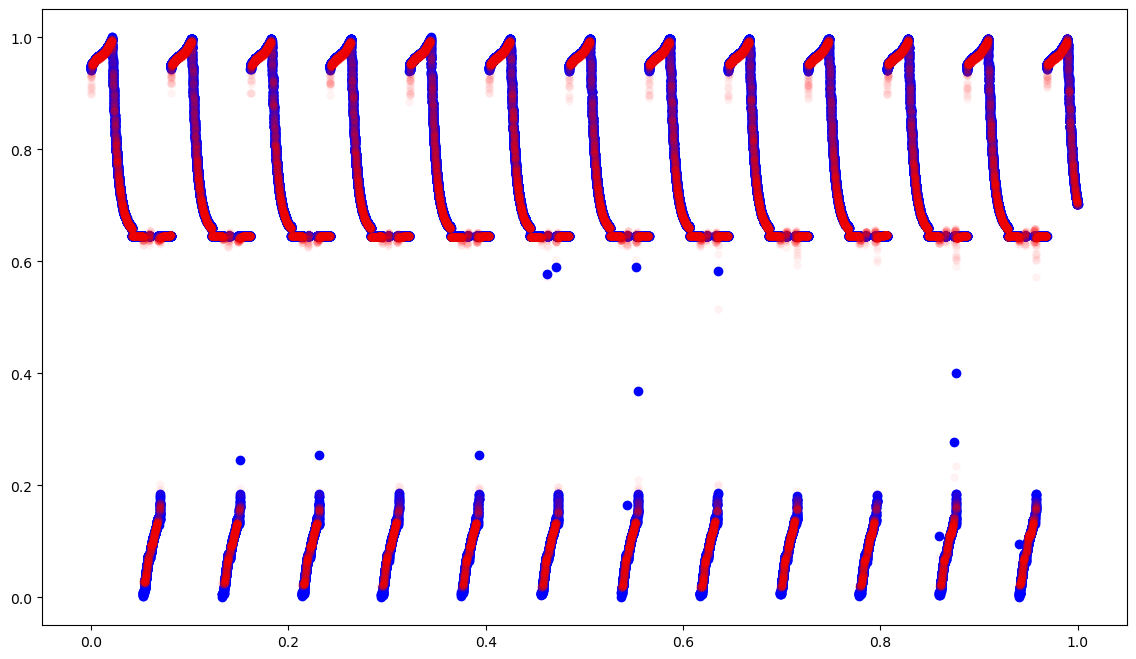

In [39]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_2,color='red',alpha=0.05,linewidths=0.02)
plt.show()

## Model 3
Best

In [40]:
%%time
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'relu',return_sequences=True, input_shape=(7,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_3 = model_3.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
6073/6073 [==============================] - 43s 7ms/step - loss: 0.0240 - rmse: 0.0690 - mae: 0.0240 - mse: 0.0048 - val_loss: 0.0048 - val_rmse: 0.0064 - val_mae: 0.0048 - val_mse: 4.1457e-05
Epoch 2/40
6073/6073 [==============================] - 43s 7ms/step - loss: 0.0057 - rmse: 0.0080 - mae: 0.0057 - mse: 6.4184e-05 - val_loss: 0.0138 - val_rmse: 0.0155 - val_mae: 0.0138 - val_mse: 2.4140e-04
Epoch 3/40
6073/6073 [==============================] - 42s 7ms/step - loss: 0.0039 - rmse: 0.0055 - mae: 0.0039 - mse: 3.0735e-05 - val_loss: 0.0023 - val_rmse: 0.0036 - val_mae: 0.0023 - val_mse: 1.3024e-05
Epoch 4/40
6073/6073 [==============================] - 49s 8ms/step - loss: 0.0029 - rmse: 0.0042 - mae: 0.0029 - mse: 1.8057e-05 - val_loss: 0.0023 - val_rmse: 0.0036 - val_mae: 0.0023 - val_mse: 1.2795e-05
Epoch 5/40
6073/6073 [==============================] - 38s 6ms/step - loss: 0.0023 - rmse: 0.0036 - mae: 0.0023 - mse: 1.2889e-05 - val_loss: 0.0013 - val_rmse: 0.0029

6073/6073 [==============================] - 39s 6ms/step - loss: 5.5466e-04 - rmse: 0.0016 - mae: 5.5466e-04 - mse: 2.4792e-06 - val_loss: 8.5577e-04 - val_rmse: 0.0024 - val_mae: 8.5577e-04 - val_mse: 5.8637e-06
Epoch 39/40
6073/6073 [==============================] - 41s 7ms/step - loss: 5.4331e-04 - rmse: 0.0016 - mae: 5.4331e-04 - mse: 2.4435e-06 - val_loss: 4.3956e-04 - val_rmse: 0.0022 - val_mae: 4.3956e-04 - val_mse: 4.8463e-06
Epoch 40/40
6073/6073 [==============================] - 39s 6ms/step - loss: 5.4464e-04 - rmse: 0.0016 - mae: 5.4464e-04 - mse: 2.4706e-06 - val_loss: 5.4583e-04 - val_rmse: 0.0022 - val_mae: 5.4583e-04 - val_mse: 4.9929e-06
CPU times: total: 1h 26min 41s
Wall time: 27min 47s


In [41]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_11 (Dense)            (None, 20)                620       
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


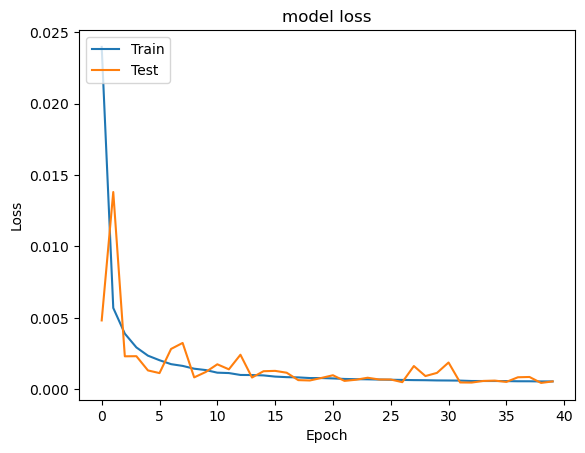

In [42]:
plot_his(history_3)

In [43]:
%%time
model_3.evaluate(X_test,Y_test)

1519/1519 [==============================] - 4s 3ms/step - loss: 5.4583e-04 - rmse: 0.0022 - mae: 5.4583e-04 - mse: 4.9929e-06
CPU times: total: 7.77 s
Wall time: 4.08 s


[0.0005458260420709848,
 0.002234476385638118,
 0.0005458260420709848,
 4.992884441890055e-06]

In [44]:
prediction_3 = model_3.predict(X_test)

1519/1519 [==============================] - 5s 3ms/step


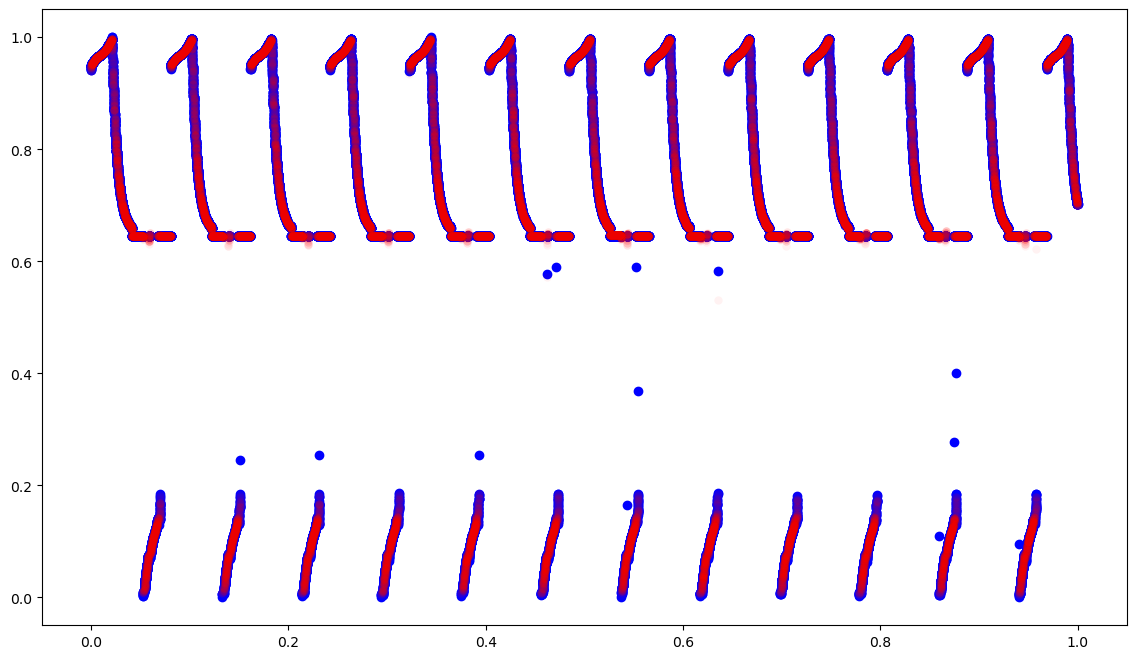

In [45]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_3,color='red',alpha=0.05,linewidths=0.02)
plt.show()

# CNN

## Model 4
CNN

In [46]:
%%time
model_4 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_4 = model_4.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0092 - rmse: 0.0535 - mae: 0.0092 - mse: 0.0029 - val_loss: 0.0033 - val_rmse: 0.0061 - val_mae: 0.0033 - val_mse: 3.6750e-05
Epoch 2/50
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0022 - rmse: 0.0046 - mae: 0.0022 - mse: 2.1519e-05 - val_loss: 0.0016 - val_rmse: 0.0040 - val_mae: 0.0016 - val_mse: 1.5963e-05
Epoch 3/50
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0016 - rmse: 0.0036 - mae: 0.0016 - mse: 1.2717e-05 - val_loss: 0.0017 - val_rmse: 0.0034 - val_mae: 0.0017 - val_mse: 1.1308e-05
Epoch 4/50
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0014 - rmse: 0.0030 - mae: 0.0014 - mse: 9.2372e-06 - val_loss: 0.0021 - val_rmse: 0.0034 - val_mae: 0.0021 - val_mse: 1.1842e-05
Epoch 5/50
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0012 - rmse: 0.0027 - mae: 0.0012 - mse: 7.3444e-06 - val_loss: 0.0015 - val_rmse: 0.0027 -

Epoch 38/50
6073/6073 [==============================] - 11s 2ms/step - loss: 5.3421e-04 - rmse: 0.0013 - mae: 5.3421e-04 - mse: 1.7656e-06 - val_loss: 6.7780e-04 - val_rmse: 0.0014 - val_mae: 6.7780e-04 - val_mse: 1.8780e-06
Epoch 39/50
6073/6073 [==============================] - 10s 2ms/step - loss: 5.2866e-04 - rmse: 0.0013 - mae: 5.2866e-04 - mse: 1.7562e-06 - val_loss: 8.0921e-04 - val_rmse: 0.0015 - val_mae: 8.0921e-04 - val_mse: 2.1803e-06
Epoch 40/50
6073/6073 [==============================] - 10s 2ms/step - loss: 5.2383e-04 - rmse: 0.0013 - mae: 5.2383e-04 - mse: 1.7385e-06 - val_loss: 5.0288e-04 - val_rmse: 0.0013 - val_mae: 5.0288e-04 - val_mse: 1.7842e-06
Epoch 41/50
6073/6073 [==============================] - 10s 2ms/step - loss: 5.2006e-04 - rmse: 0.0013 - mae: 5.2006e-04 - mse: 1.7306e-06 - val_loss: 5.5048e-04 - val_rmse: 0.0013 - val_mae: 5.5048e-04 - val_mse: 1.7971e-06
Epoch 42/50
6073/6073 [==============================] - 10s 2ms/step - loss: 5.1791e-04 - rmse:

In [47]:
model_4.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 6.3254e-04 - rmse: 0.0014 - mae: 6.3254e-04 - mse: 1.8272e-06


[0.0006325403810478747,
 0.0013517418410629034,
 0.0006325403810478747,
 1.8272058923685108e-06]

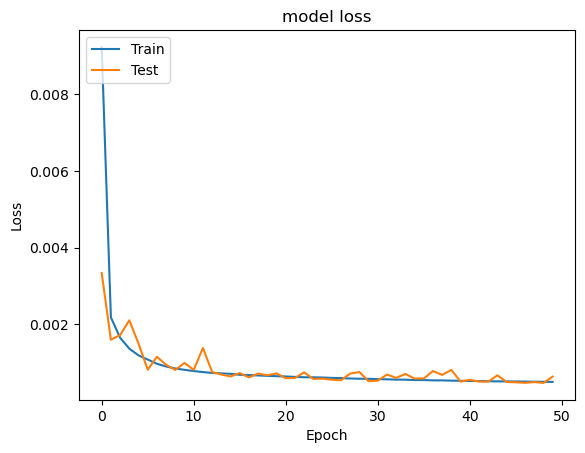

In [48]:
plot_his(history_4)

In [49]:
prediction_4 = model_4.predict(X_test)

1519/1519 [==============================] - 1s 746us/step


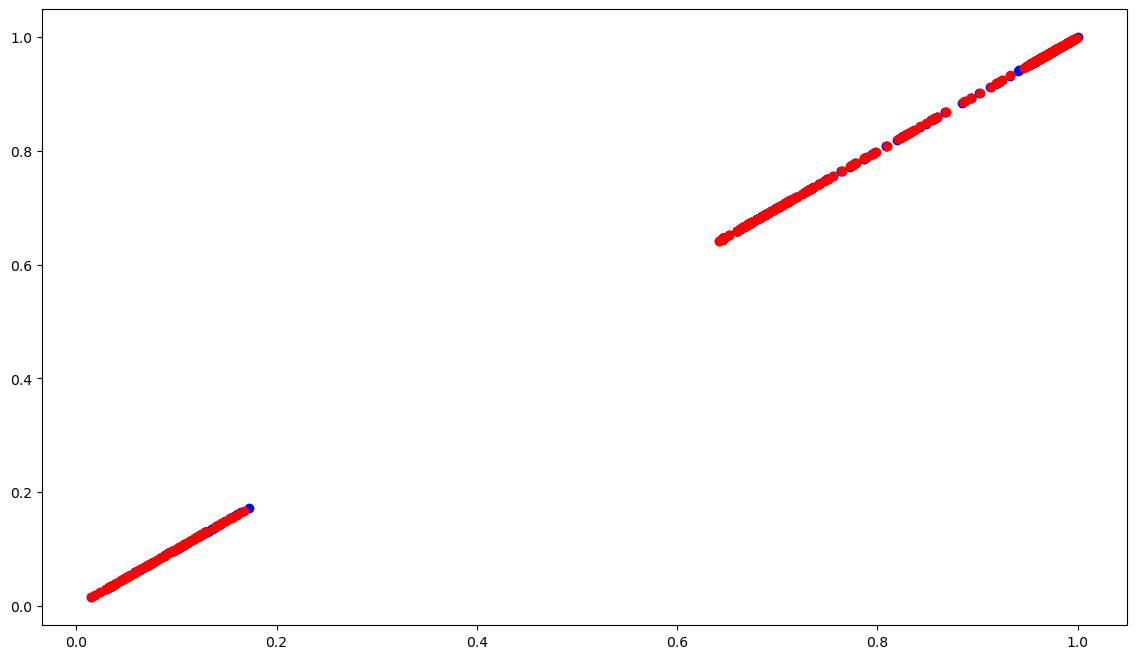

In [50]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_4[300:900], prediction_4[300:900], color='red')
plt.show()

In [51]:
model_4.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 6.3254e-04 - rmse: 0.0014 - mae: 6.3254e-04 - mse: 1.8272e-06


[0.0006325403810478747,
 0.0013517418410629034,
 0.0006325403810478747,
 1.8272058923685108e-06]

## Model 5 (Best)

In [52]:
%%time
model_5 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='relu',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_5 = model_5.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0095 - rmse: 0.0373 - mae: 0.0095 - mse: 0.0014 - val_loss: 0.0117 - val_rmse: 0.0127 - val_mae: 0.0117 - val_mse: 1.6039e-04
Epoch 2/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0033 - rmse: 0.0045 - mae: 0.0033 - mse: 2.0691e-05 - val_loss: 0.0020 - val_rmse: 0.0027 - val_mae: 0.0020 - val_mse: 7.3115e-06
Epoch 3/100
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0024 - rmse: 0.0032 - mae: 0.0024 - mse: 1.0041e-05 - val_loss: 0.0013 - val_rmse: 0.0020 - val_mae: 0.0013 - val_mse: 4.1053e-06
Epoch 4/100
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0019 - rmse: 0.0026 - mae: 0.0019 - mse: 6.6027e-06 - val_loss: 9.7815e-04 - val_rmse: 0.0015 - val_mae: 9.7815e-04 - val_mse: 2.2825e-06
Epoch 5/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0015 - rmse: 0.0021 - mae: 0.0015 - mse: 4.2632e-06 - val_loss: 0.0011 - val

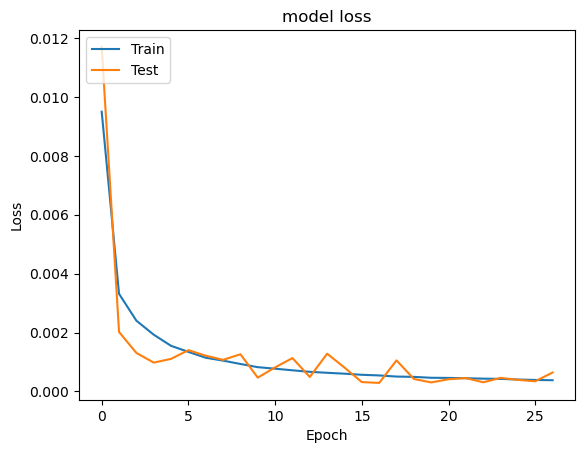

In [53]:
plot_his(history_5)

In [54]:
model_5.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 6.4249e-04 - rmse: 8.7789e-04 - mae: 6.4249e-04 - mse: 7.7069e-07


[0.0006424894090741873,
 0.0008778885239735246,
 0.0006424894090741873,
 7.706883025093703e-07]

In [55]:
prediction_5 = model_5.predict(X_test)

1519/1519 [==============================] - 2s 949us/step


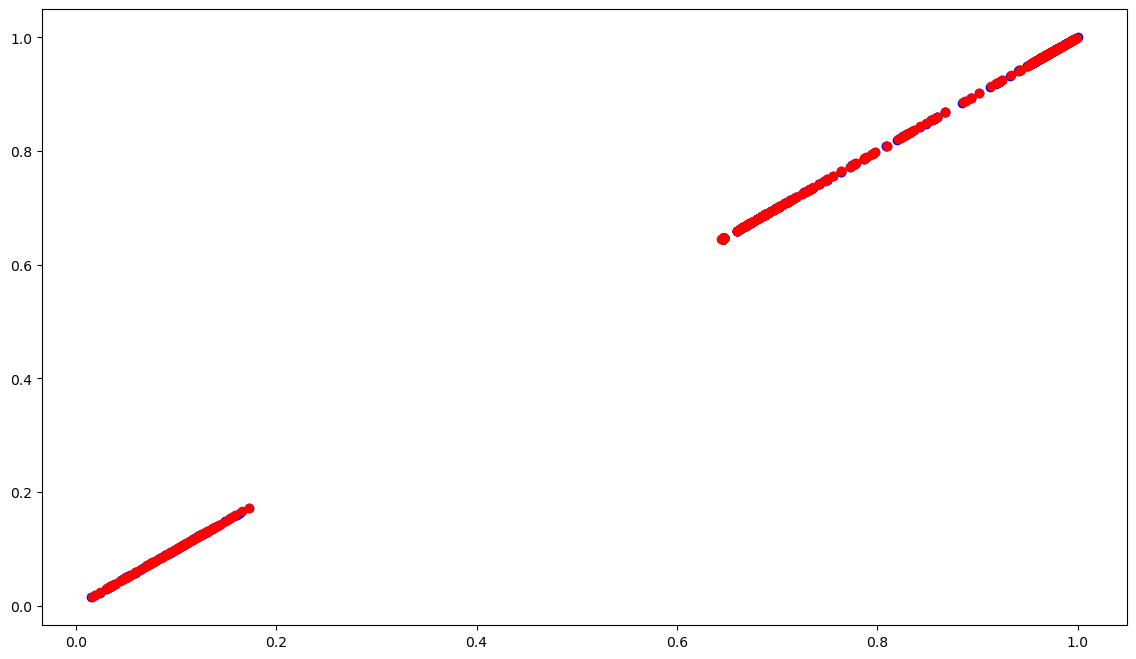

In [56]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_5[300:900], prediction_5[300:900], color='red')
plt.show()

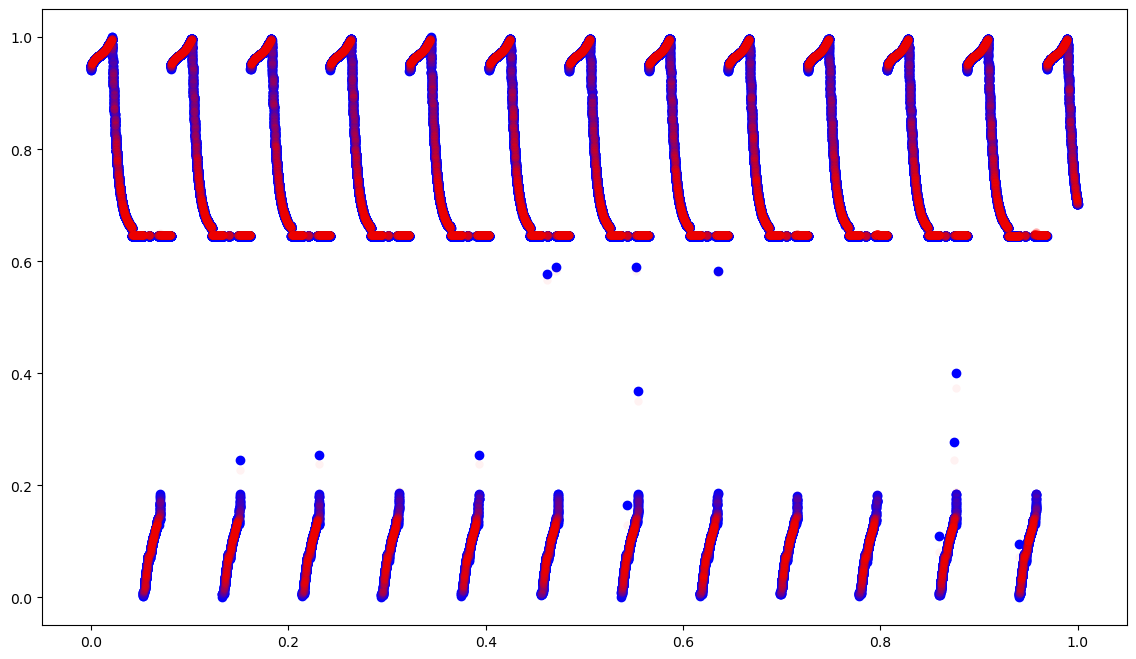

In [57]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_5,color='red',alpha=0.05,linewidths=0.02)
plt.show()

## Model 6

In [61]:
%%time
model_6 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='relu',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(10,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(16,activation="linear"),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_6 = model_6.fit(X_train,Y_train,epochs=80,validation_data=(X_test,Y_test))

Epoch 1/80
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0042 - rmse: 0.0187 - mae: 0.0042 - mse: 3.5154e-04 - val_loss: 0.0019 - val_rmse: 0.0050 - val_mae: 0.0019 - val_mse: 2.4603e-05
Epoch 2/80
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0016 - rmse: 0.0045 - mae: 0.0016 - mse: 2.0541e-05 - val_loss: 0.0020 - val_rmse: 0.0046 - val_mae: 0.0020 - val_mse: 2.1316e-05
Epoch 3/80
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0014 - rmse: 0.0044 - mae: 0.0014 - mse: 1.9576e-05 - val_loss: 0.0013 - val_rmse: 0.0045 - val_mae: 0.0013 - val_mse: 2.0211e-05
Epoch 4/80
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0013 - rmse: 0.0043 - mae: 0.0013 - mse: 1.8889e-05 - val_loss: 0.0013 - val_rmse: 0.0045 - val_mae: 0.0013 - val_mse: 1.9907e-05
Epoch 5/80
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0012 - rmse: 0.0043 - mae: 0.0012 - mse: 1.8421e-05 - val_loss: 0.0012 - val_rmse: 0.

Epoch 40/80
6073/6073 [==============================] - 11s 2ms/step - loss: 9.6982e-04 - rmse: 0.0036 - mae: 9.6982e-04 - mse: 1.2792e-05 - val_loss: 0.0010 - val_rmse: 0.0037 - val_mae: 0.0010 - val_mse: 1.3883e-05
Epoch 41/80
6073/6073 [==============================] - 10s 2ms/step - loss: 9.6665e-04 - rmse: 0.0036 - mae: 9.6665e-04 - mse: 1.2722e-05 - val_loss: 9.8602e-04 - val_rmse: 0.0037 - val_mae: 9.8602e-04 - val_mse: 1.3674e-05
Epoch 42/80
6073/6073 [==============================] - 14s 2ms/step - loss: 9.6407e-04 - rmse: 0.0036 - mae: 9.6407e-04 - mse: 1.2652e-05 - val_loss: 9.8868e-04 - val_rmse: 0.0037 - val_mae: 9.8868e-04 - val_mse: 1.3541e-05
Epoch 43/80
6073/6073 [==============================] - 17s 3ms/step - loss: 9.6113e-04 - rmse: 0.0035 - mae: 9.6113e-04 - mse: 1.2581e-05 - val_loss: 9.8283e-04 - val_rmse: 0.0037 - val_mae: 9.8283e-04 - val_mse: 1.3596e-05
Epoch 44/80
6073/6073 [==============================] - 18s 3ms/step - loss: 9.5819e-04 - rmse: 0.0035 

6073/6073 [==============================] - 12s 2ms/step - loss: 9.0321e-04 - rmse: 0.0033 - mae: 9.0321e-04 - mse: 1.0971e-05 - val_loss: 9.2021e-04 - val_rmse: 0.0034 - val_mae: 9.2021e-04 - val_mse: 1.1818e-05
Epoch 77/80
6073/6073 [==============================] - 12s 2ms/step - loss: 9.0230e-04 - rmse: 0.0033 - mae: 9.0230e-04 - mse: 1.0938e-05 - val_loss: 9.1871e-04 - val_rmse: 0.0034 - val_mae: 9.1871e-04 - val_mse: 1.1783e-05
Epoch 78/80
6073/6073 [==============================] - 10s 2ms/step - loss: 9.0097e-04 - rmse: 0.0033 - mae: 9.0097e-04 - mse: 1.0904e-05 - val_loss: 9.2068e-04 - val_rmse: 0.0034 - val_mae: 9.2068e-04 - val_mse: 1.1756e-05
Epoch 79/80
6073/6073 [==============================] - 11s 2ms/step - loss: 8.9991e-04 - rmse: 0.0033 - mae: 8.9991e-04 - mse: 1.0863e-05 - val_loss: 9.2361e-04 - val_rmse: 0.0034 - val_mae: 9.2361e-04 - val_mse: 1.1672e-05
Epoch 80/80
6073/6073 [==============================] - 13s 2ms/step - loss: 8.9911e-04 - rmse: 0.0033 - ma

In [62]:
model_6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 5, 10)             40        
                                                                 
 conv1d_5 (Conv1D)           (None, 4, 10)             210       
                                                                 
 flatten_2 (Flatten)         (None, 40)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                656       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 923
Trainable params: 923
Non-trainable params: 0
_________________________________________________________________


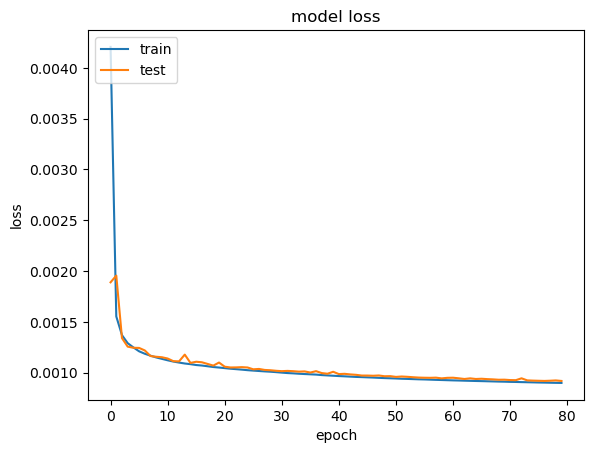

In [63]:
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1519/1519 [==============================] - 2s 1ms/step


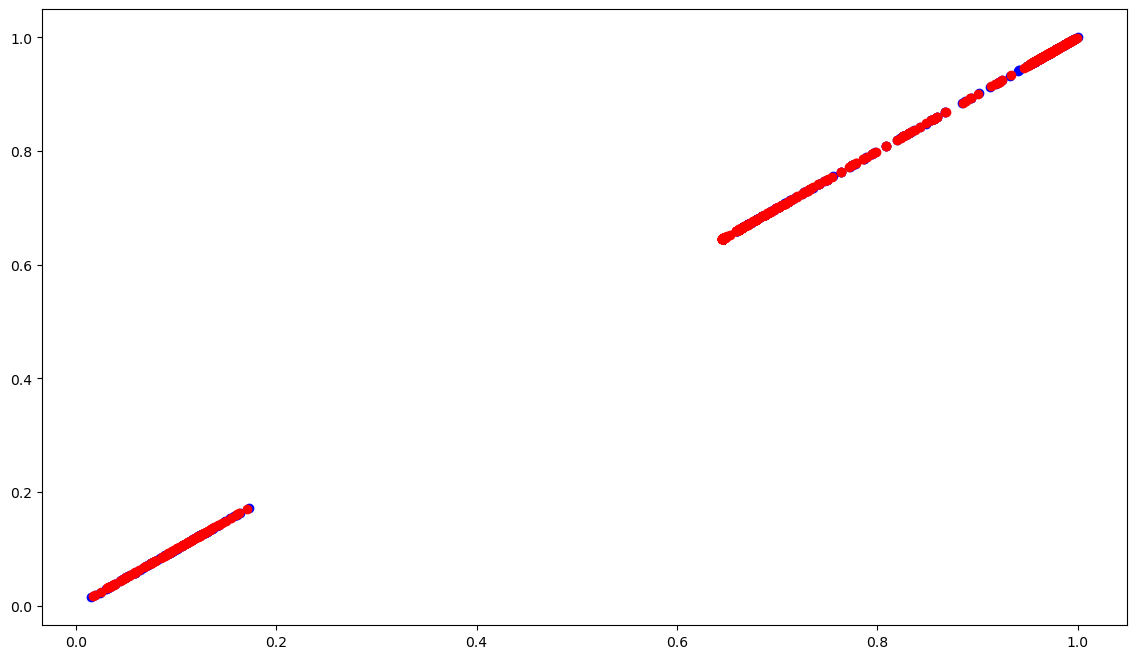

In [64]:
prediction_6 = model_6.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_6[300:900], prediction_6[300:900], color='red')
plt.show()

In [65]:
model_6.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 9.1848e-04 - rmse: 0.0034 - mae: 9.1848e-04 - mse: 1.1680e-05


[0.000918482372071594,
 0.003417633706703782,
 0.000918482372071594,
 1.1680219358822796e-05]

## Model 7 (Best)

In [66]:
%%time
model_7 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='relu',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(16,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(10,activation="relu"),
                               #tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_7 = model_7.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0133 - rmse: 0.0574 - mae: 0.0133 - mse: 0.0033 - val_loss: 0.0015 - val_rmse: 0.0046 - val_mae: 0.0015 - val_mse: 2.1328e-05
Epoch 2/100
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0016 - rmse: 0.0042 - mae: 0.0016 - mse: 1.7436e-05 - val_loss: 0.0015 - val_rmse: 0.0040 - val_mae: 0.0015 - val_mse: 1.5906e-05
Epoch 3/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0014 - rmse: 0.0037 - mae: 0.0014 - mse: 1.3498e-05 - val_loss: 0.0019 - val_rmse: 0.0039 - val_mae: 0.0019 - val_mse: 1.4838e-05
Epoch 4/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0013 - rmse: 0.0033 - mae: 0.0013 - mse: 1.1025e-05 - val_loss: 8.7892e-04 - val_rmse: 0.0031 - val_mae: 8.7892e-04 - val_mse: 9.8779e-06
Epoch 5/100
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0013 - rmse: 0.0030 - mae: 0.0013 - mse: 9.1959e-06 - val_loss: 0.0013 - val

6073/6073 [==============================] - 11s 2ms/step - loss: 7.7448e-04 - rmse: 0.0010 - mae: 7.7448e-04 - mse: 1.0208e-06 - val_loss: 0.0016 - val_rmse: 0.0018 - val_mae: 0.0016 - val_mse: 3.3260e-06
Epoch 39/100
6073/6073 [==============================] - 12s 2ms/step - loss: 7.7255e-04 - rmse: 0.0010 - mae: 7.7255e-04 - mse: 1.0423e-06 - val_loss: 4.5409e-04 - val_rmse: 6.5905e-04 - val_mae: 4.5409e-04 - val_mse: 4.3435e-07
Epoch 40/100
6073/6073 [==============================] - 11s 2ms/step - loss: 7.5597e-04 - rmse: 9.8977e-04 - mae: 7.5597e-04 - mse: 9.7964e-07 - val_loss: 3.8862e-04 - val_rmse: 7.0784e-04 - val_mae: 3.8862e-04 - val_mse: 5.0103e-07
Epoch 41/100
6073/6073 [==============================] - 11s 2ms/step - loss: 7.5706e-04 - rmse: 9.8836e-04 - mae: 7.5706e-04 - mse: 9.7685e-07 - val_loss: 4.9556e-04 - val_rmse: 7.9723e-04 - val_mae: 4.9556e-04 - val_mse: 6.3557e-07
Epoch 42/100
6073/6073 [==============================] - 12s 2ms/step - loss: 7.5555e-04 - r

6073/6073 [==============================] - 11s 2ms/step - loss: 6.8907e-04 - rmse: 8.9861e-04 - mae: 6.8907e-04 - mse: 8.0750e-07 - val_loss: 3.6676e-04 - val_rmse: 5.9261e-04 - val_mae: 3.6676e-04 - val_mse: 3.5119e-07
Epoch 74/100
6073/6073 [==============================] - 11s 2ms/step - loss: 6.9010e-04 - rmse: 9.1202e-04 - mae: 6.9010e-04 - mse: 8.3177e-07 - val_loss: 5.7612e-04 - val_rmse: 7.0721e-04 - val_mae: 5.7612e-04 - val_mse: 5.0014e-07
Epoch 75/100
6073/6073 [==============================] - 10s 2ms/step - loss: 6.6485e-04 - rmse: 8.7147e-04 - mae: 6.6485e-04 - mse: 7.5946e-07 - val_loss: 3.8158e-04 - val_rmse: 5.6895e-04 - val_mae: 3.8158e-04 - val_mse: 3.2370e-07
Epoch 76/100
6073/6073 [==============================] - 11s 2ms/step - loss: 6.6663e-04 - rmse: 8.8303e-04 - mae: 6.6663e-04 - mse: 7.7974e-07 - val_loss: 4.7348e-04 - val_rmse: 6.5084e-04 - val_mae: 4.7348e-04 - val_mse: 4.2359e-07
Epoch 77/100
6073/6073 [==============================] - 14s 2ms/step - 

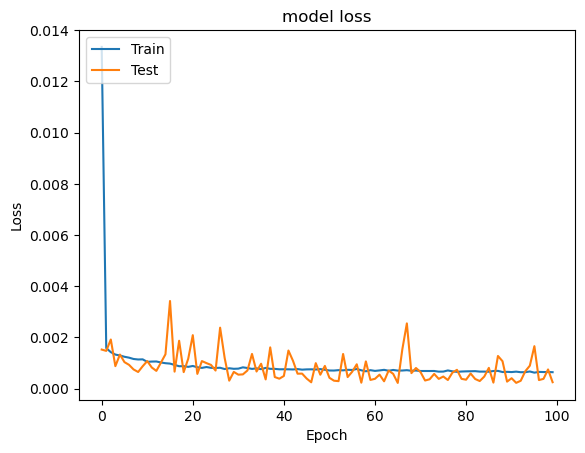

In [67]:
plot_his(history_7)

1519/1519 [==============================] - 1s 732us/step


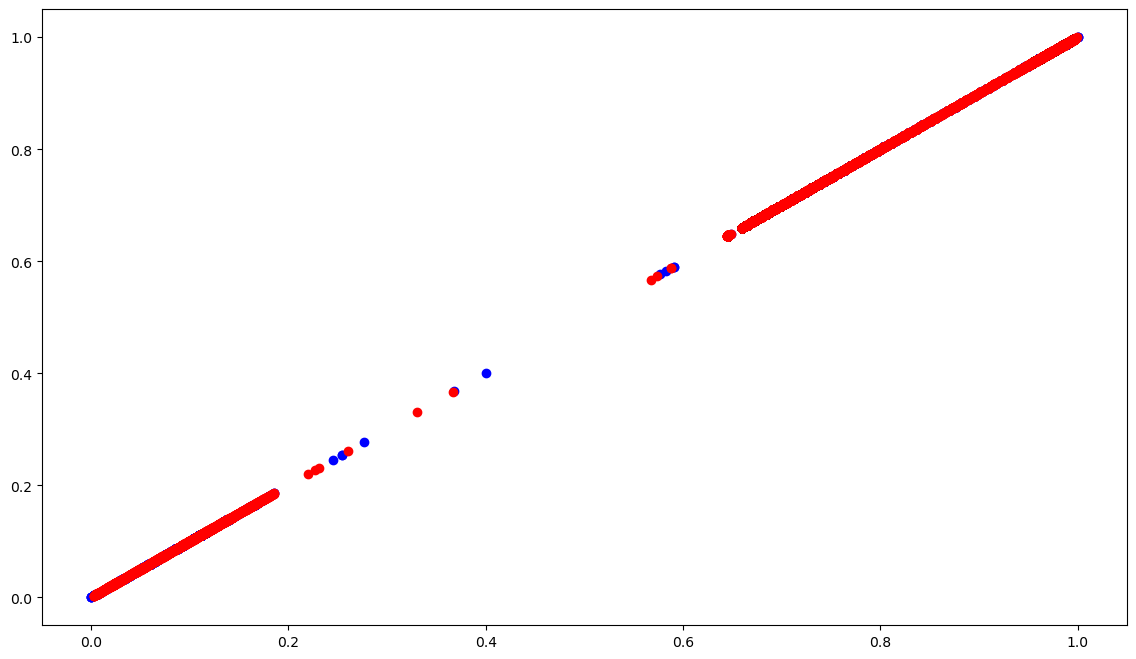

In [68]:
prediction_7 = model_7.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test, Y_test, color='blue')
plt.scatter(prediction_7, prediction_7, color='red')
plt.show()

In [69]:
model_7.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 2ms/step - loss: 2.5208e-04 - rmse: 5.0634e-04 - mae: 2.5208e-04 - mse: 2.5638e-07


[0.00025208195438608527,
 0.0005063438438810408,
 0.00025208195438608527,
 2.56384083741068e-07]

## Model 8 (Best)

In [70]:
%%time
model_8 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='relu',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(8,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_8 = model_8.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0067 - rmse: 0.0444 - mae: 0.0067 - mse: 0.0020 - val_loss: 0.0034 - val_rmse: 0.0059 - val_mae: 0.0034 - val_mse: 3.4910e-05
Epoch 2/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0020 - rmse: 0.0051 - mae: 0.0020 - mse: 2.5938e-05 - val_loss: 0.0013 - val_rmse: 0.0046 - val_mae: 0.0013 - val_mse: 2.1307e-05
Epoch 3/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0015 - rmse: 0.0041 - mae: 0.0015 - mse: 1.7201e-05 - val_loss: 0.0031 - val_rmse: 0.0045 - val_mae: 0.0031 - val_mse: 2.0018e-05
Epoch 4/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0013 - rmse: 0.0033 - mae: 0.0013 - mse: 1.0838e-05 - val_loss: 0.0015 - val_rmse: 0.0031 - val_mae: 0.0015 - val_mse: 9.7168e-06
Epoch 5/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0011 - rmse: 0.0024 - mae: 0.0011 - mse: 5.9375e-06 - val_loss: 0.0010 - val_rmse: 0

Epoch 37/100
6073/6073 [==============================] - 9s 1ms/step - loss: 2.5031e-04 - rmse: 6.4613e-04 - mae: 2.5031e-04 - mse: 4.1748e-07 - val_loss: 2.3709e-04 - val_rmse: 8.7758e-04 - val_mae: 2.3709e-04 - val_mse: 7.7015e-07
Epoch 38/100
6073/6073 [==============================] - 9s 1ms/step - loss: 2.4538e-04 - rmse: 6.4288e-04 - mae: 2.4538e-04 - mse: 4.1329e-07 - val_loss: 2.0353e-04 - val_rmse: 8.7237e-04 - val_mae: 2.0353e-04 - val_mse: 7.6103e-07
Epoch 39/100
6073/6073 [==============================] - 9s 2ms/step - loss: 2.4517e-04 - rmse: 6.4295e-04 - mae: 2.4517e-04 - mse: 4.1339e-07 - val_loss: 2.2113e-04 - val_rmse: 8.7748e-04 - val_mae: 2.2113e-04 - val_mse: 7.6997e-07
Epoch 40/100
6073/6073 [==============================] - 9s 1ms/step - loss: 2.3812e-04 - rmse: 6.3817e-04 - mae: 2.3812e-04 - mse: 4.0726e-07 - val_loss: 2.6910e-04 - val_rmse: 8.9187e-04 - val_mae: 2.6910e-04 - val_mse: 7.9542e-07
Epoch 41/100
6073/6073 [==============================] - 9s 2ms

Epoch 72/100
6073/6073 [==============================] - 9s 2ms/step - loss: 1.8664e-04 - rmse: 6.0856e-04 - mae: 1.8664e-04 - mse: 3.7034e-07 - val_loss: 1.7411e-04 - val_rmse: 8.4357e-04 - val_mae: 1.7411e-04 - val_mse: 7.1161e-07
Epoch 73/100
6073/6073 [==============================] - 9s 2ms/step - loss: 1.8401e-04 - rmse: 6.0819e-04 - mae: 1.8401e-04 - mse: 3.6989e-07 - val_loss: 4.6846e-04 - val_rmse: 9.6047e-04 - val_mae: 4.6846e-04 - val_mse: 9.2250e-07
Epoch 74/100
6073/6073 [==============================] - 9s 1ms/step - loss: 1.8404e-04 - rmse: 6.0761e-04 - mae: 1.8404e-04 - mse: 3.6919e-07 - val_loss: 1.9584e-04 - val_rmse: 8.4652e-04 - val_mae: 1.9584e-04 - val_mse: 7.1659e-07
Epoch 75/100
6073/6073 [==============================] - 9s 2ms/step - loss: 1.8427e-04 - rmse: 6.0692e-04 - mae: 1.8427e-04 - mse: 3.6836e-07 - val_loss: 1.8886e-04 - val_rmse: 8.4457e-04 - val_mae: 1.8886e-04 - val_mse: 7.1331e-07
Epoch 76/100
6073/6073 [==============================] - 9s 1ms

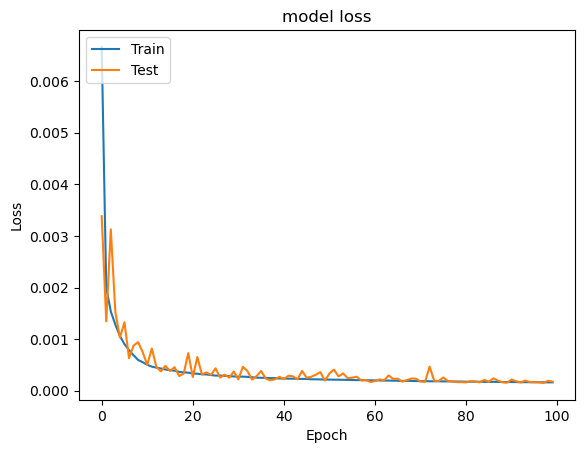

In [71]:
plot_his(history_8)

In [72]:
model_8.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 1.7686e-04 - rmse: 8.3095e-04 - mae: 1.7686e-04 - mse: 6.9048e-07


[0.00017685900093056262,
 0.0008309524273499846,
 0.00017685900093056262,
 6.90481897436257e-07]

In [79]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(12, 8))
# # plt.plot(df['SOC'])
# plt.plot(X_test['Time'],Y_test,color='blue')
# plt.plot(X_test['Time'],prediction_3,color='red')

# plt.ylabel('SOC')
# # make x-axis ticks legible
# adf = plt.gca().get_xaxis().get_major_formatter()
# plt.xlabel('Time')
# plt.title('Trial Dataset')

# GPR
GAUSSIAN PROCESS REGRESSION
link - https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

Link_1 = https://www.kaggle.com/discussions/questions-and-answers/47716

Link_2 = https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

Link_3 = https://www.kaggle.com/code/sterby/gaussian-process-regression-benchmark


# SVR
Support vector regressor

In [81]:
from sklearn.svm import SVR, LinearSVR

In [82]:
svr = SVR().fit(X, Y)
print(svr)

SVR()


In [83]:
y_pred_svr = svr.predict(X)

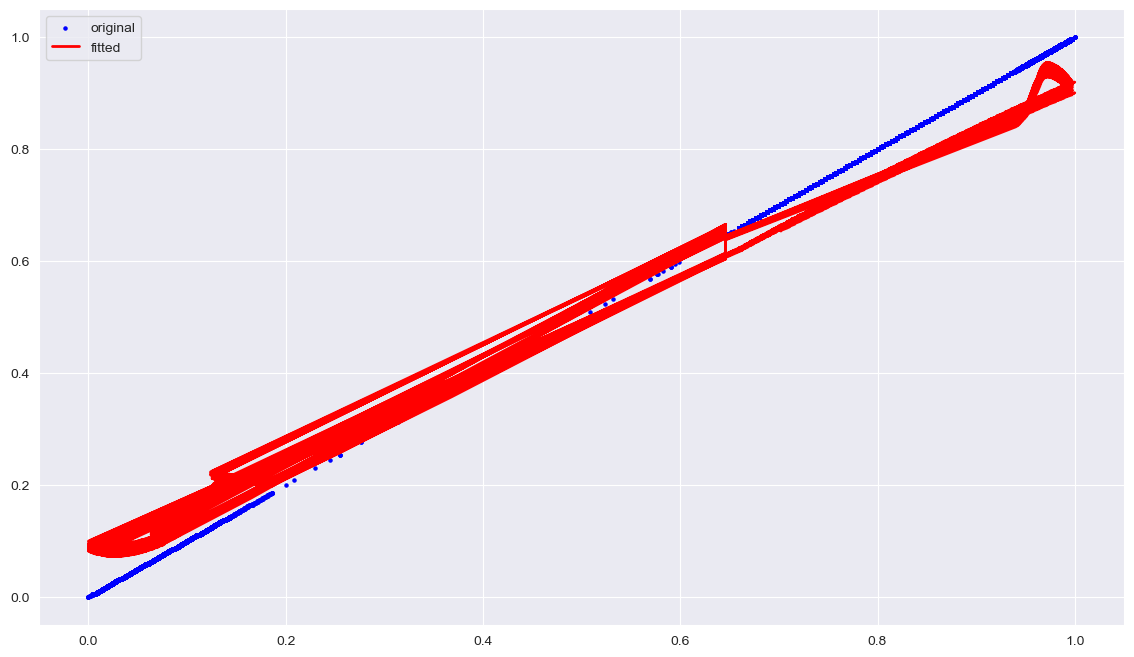

In [84]:
plt.figure(figsize=(14,8))
plt.scatter(Y, Y, s=5, color="blue", label="original")
plt.plot(Y, y_pred_svr, lw=2, color="red", label="fitted")
plt.legend()
plt.show()

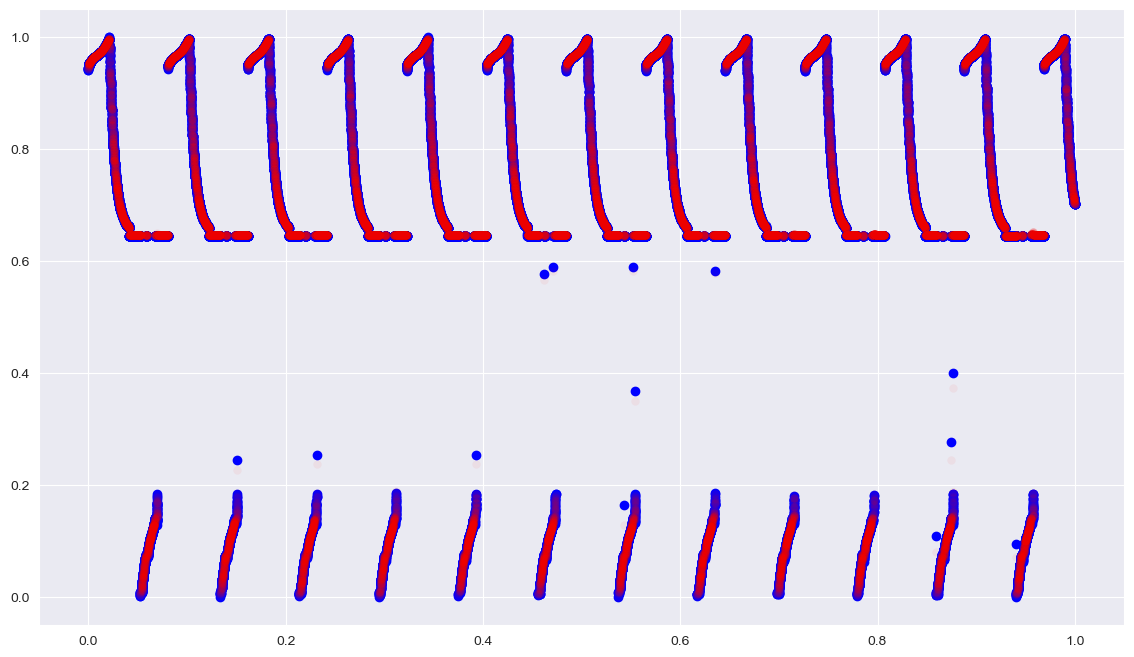

In [85]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_5,color='red',alpha=0.05,linewidths=0.02)
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error
score = svr.score(X,Y)
print("R-squared:", score)
print("MSE:", mean_squared_error(Y, y_pred_svr))

R-squared: 0.9781345703507904
MSE: 0.0018574230691018672


In [87]:
kernel = ['linear','rbf']        # For both the kernel
for i in kernel:
  model = SVR(kernel=i,C=1.0)
  model.fit(X_train,Y_train)
  print(f"For Kernel {i}")
  print("Accuracy is :", model.score(X_test,Y_test))

For Kernel linear
Accuracy is : 0.9617582884791486
For Kernel rbf
Accuracy is : 0.9781720789672297


# RandomForest

link_1 = https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [89]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)

In [90]:
rf.score(X_test,Y_test)

0.9999973980507944

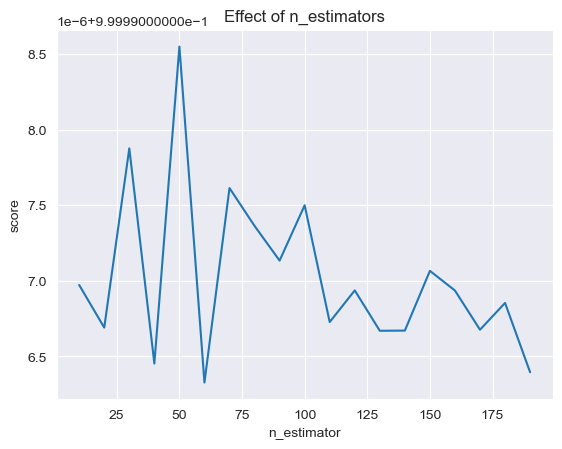

In [91]:
model = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [92]:
for i in scores:
  print(f"score is : {i}")

score is : 0.9999969723305411
score is : 0.9999966908906572
score is : 0.9999978756549273
score is : 0.9999964532708971
score is : 0.999998549010638
score is : 0.9999963275775261
score is : 0.9999976132756785
score is : 0.99999736315661
score is : 0.9999971338602495
score is : 0.9999974994648114
score is : 0.999996727533387
score is : 0.9999969368289593
score is : 0.9999966698816568
score is : 0.9999966710476976
score is : 0.9999970660584763
score is : 0.999996935909173
score is : 0.9999966767487338
score is : 0.9999968538764893
score is : 0.9999963956949243


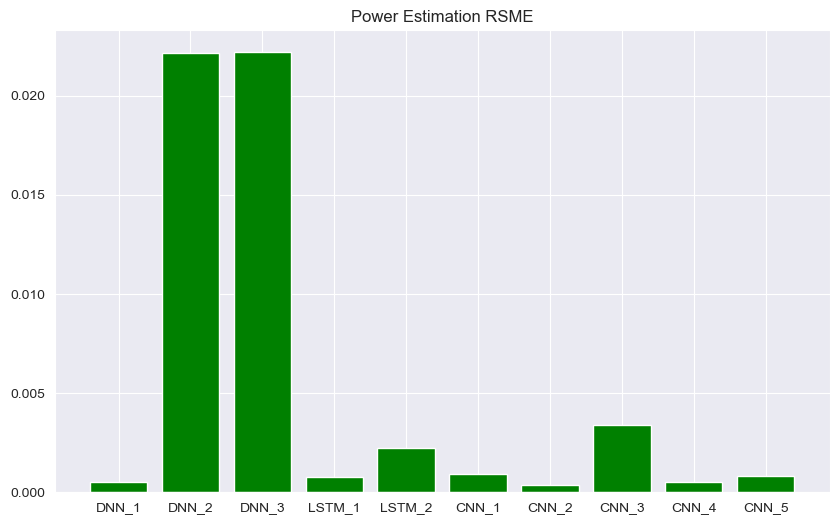

In [107]:


rmse_score = {'DNN_1':0.0005356,'DNN_2':0.02213237,'DNN_3':0.022192351,'LSTM_1':0.0007953,'LSTM_2':0.002234476,
             'CNN_1':0.000936490,'CNN_2':0.00036893,'CNN_3':0.0034176337,'CNN_4':0.000506343843,'CNN_5':0.0008309}
names = list(rmse_score.keys())
values = list(rmse_score.values())

plt.figure(figsize=(10,6))


plt.bar(range(len(rmse_score)), values,tick_label=names,color='green')

plt.title('Power Estimation RSME')
plt.show()

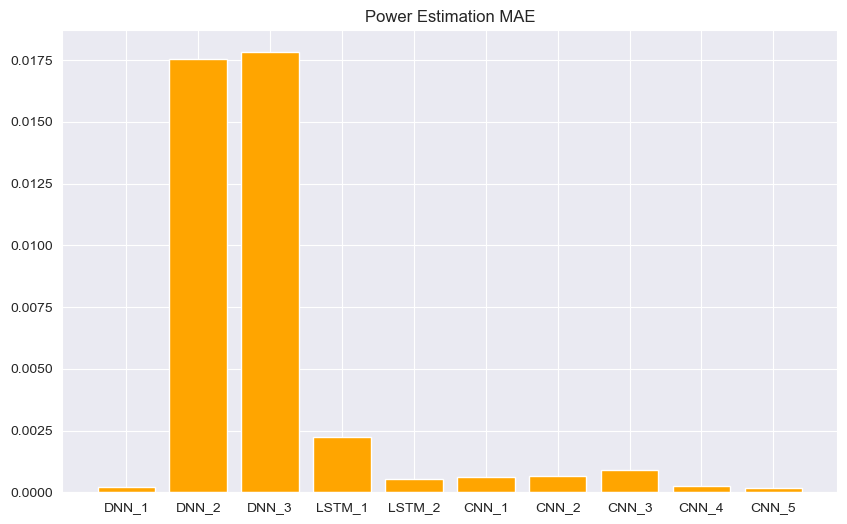

In [109]:
mae_score = {'DNN_1':0.00021487,'DNN_2':0.0175558,'DNN_3':0.0178140,'LSTM_1':0.00222312,'LSTM_2':0.00054582,
             'CNN_1':0.000632540,'CNN_2':0.000642489,'CNN_3':0.0009184,'CNN_4':0.0002520,'CNN_5':0.00017685}

names_mae = list(mae_score.keys())
values_mae = list(mae_score.values())

plt.figure(figsize=(10,6))
plt.bar(range(len(mae_score)), values_mae,tick_label=names_mae,color='orange')
plt.title('Power Estimation MAE')
plt.show()